In [1]:
import os
from datasets import load_dataset

/Users/ahava/miniconda3/envs/stt_translation/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Get dataset
data_dir = os.getenv("COVOST2_DATASET")
print(data_dir)
cv_4_0 = load_dataset(
    "facebook/covost2",
    "en_de",
    data_dir=data_dir,
    split="train",
    # streaming=True,
    trust_remote_code=True
)

/Users/ahava/datasets/common_voice/common_voice_4


Generating test split: 100%|██████████| 15531/15531 [00:04<00:00, 3730.26 examples/s] 


In [3]:
#cv_4_0 = cv_4_0.select_columns(['audio', 'sentence', 'client_id', "translation"])
print(cv_4_0)

Dataset({
    features: ['client_id', 'file', 'audio', 'sentence', 'translation', 'id'],
    num_rows: 289430
})


In [4]:
data = next(iter(cv_4_0))
audio = data["audio"]["array"]
sample_rate = data["audio"]["sampling_rate"]
transcription = data["sentence"]
translation = data["translation"]



In [5]:
print(f"data: {data}")
print(f"Audio array: {audio}")
print(f"Sample rate: {data['audio']['sampling_rate']}")
print(f"Audio shape: {audio.shape}, Sample rate: {sample_rate}")
print(f"Audio length(s): {audio.size / sample_rate:.2f} seconds")
print(f"Transcription: {transcription}")
print(f"translation: {translation}")

data: {'client_id': '4f29be8fe932d773576dd3df5e111929f4e222422322450983695eaa8625a12659cd3e999a061a29ebe71783833bebdc2d0ec6b97e9a648bf6d28979065f85ad', 'file': '/Users/ahava/datasets/common_voice/common_voice_4/clips/common_voice_en_19664034.mp3', 'audio': {'path': '/Users/ahava/datasets/common_voice/common_voice_4/clips/common_voice_en_19664034.mp3', 'array': array([-5.32907052e-15,  1.59872116e-14, -1.06581410e-14, ...,
       -9.88341635e-05, -4.29643784e-04, -4.69889608e-04], shape=(106368,)), 'sampling_rate': 16000}, 'sentence': '"These data components in turn serve as the ""building blocks"" of data exchanges."', 'translation': 'Diese Datenkomponenten wiederum dienen als die „Grundbausteine“ zum Datenaustausch.', 'id': 'common_voice_en_19664034'}
Audio array: [-5.32907052e-15  1.59872116e-14 -1.06581410e-14 ... -9.88341635e-05
 -4.29643784e-04 -4.69889608e-04]
Sample rate: 16000
Audio shape: (106368,), Sample rate: 16000
Audio length(s): 6.65 seconds
Transcription: "These data co

In [6]:
from IPython.display import Audio
Audio(audio, rate=sample_rate)

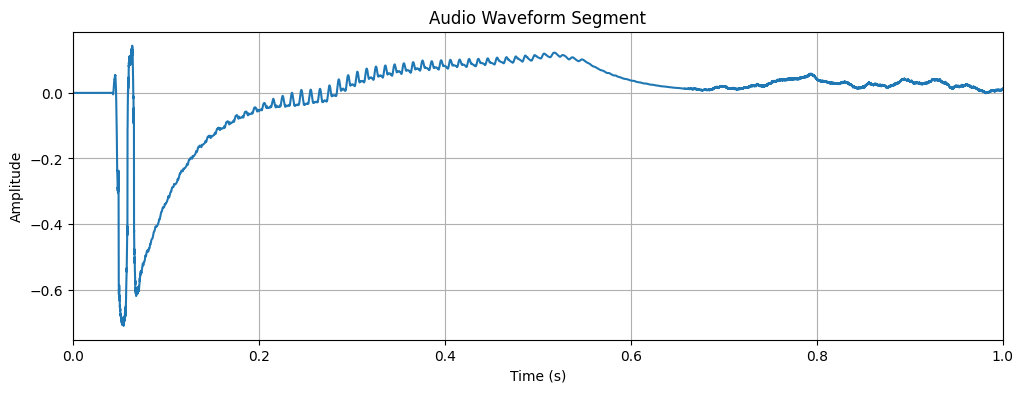

In [7]:
import matplotlib.pyplot as plt
import numpy as np

start_time_ms = 0
end_time_ms = 1000  # 1 second
start_sample = int(start_time_ms * sample_rate / 1000)
end_sample = int(end_time_ms * sample_rate / 1000)
audio_segment = audio[start_sample:end_sample]
plt.figure(figsize=(12, 4))
plt.plot(np.arange(start_sample, end_sample) / sample_rate, audio_segment)
plt.title("Audio Waveform Segment")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(start_time_ms / 1000, end_time_ms / 1000)
plt.grid()
plt.show()